In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
from IPython.core.debugger import set_trace
from collections import OrderedDict
import itertools
import os
import sys
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy
import pandas as pd

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import cufflinks

import qutip
import theano
import theano.tensor as T

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network.net_analysis_tools as nat
import qubit_network.utils
from qubit_network.Optimizer import Optimizer
from qubit_network.model import QubitNetworkDecisionProblemModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Compiling model ... done.


<IPython.core.display.Javascript object>


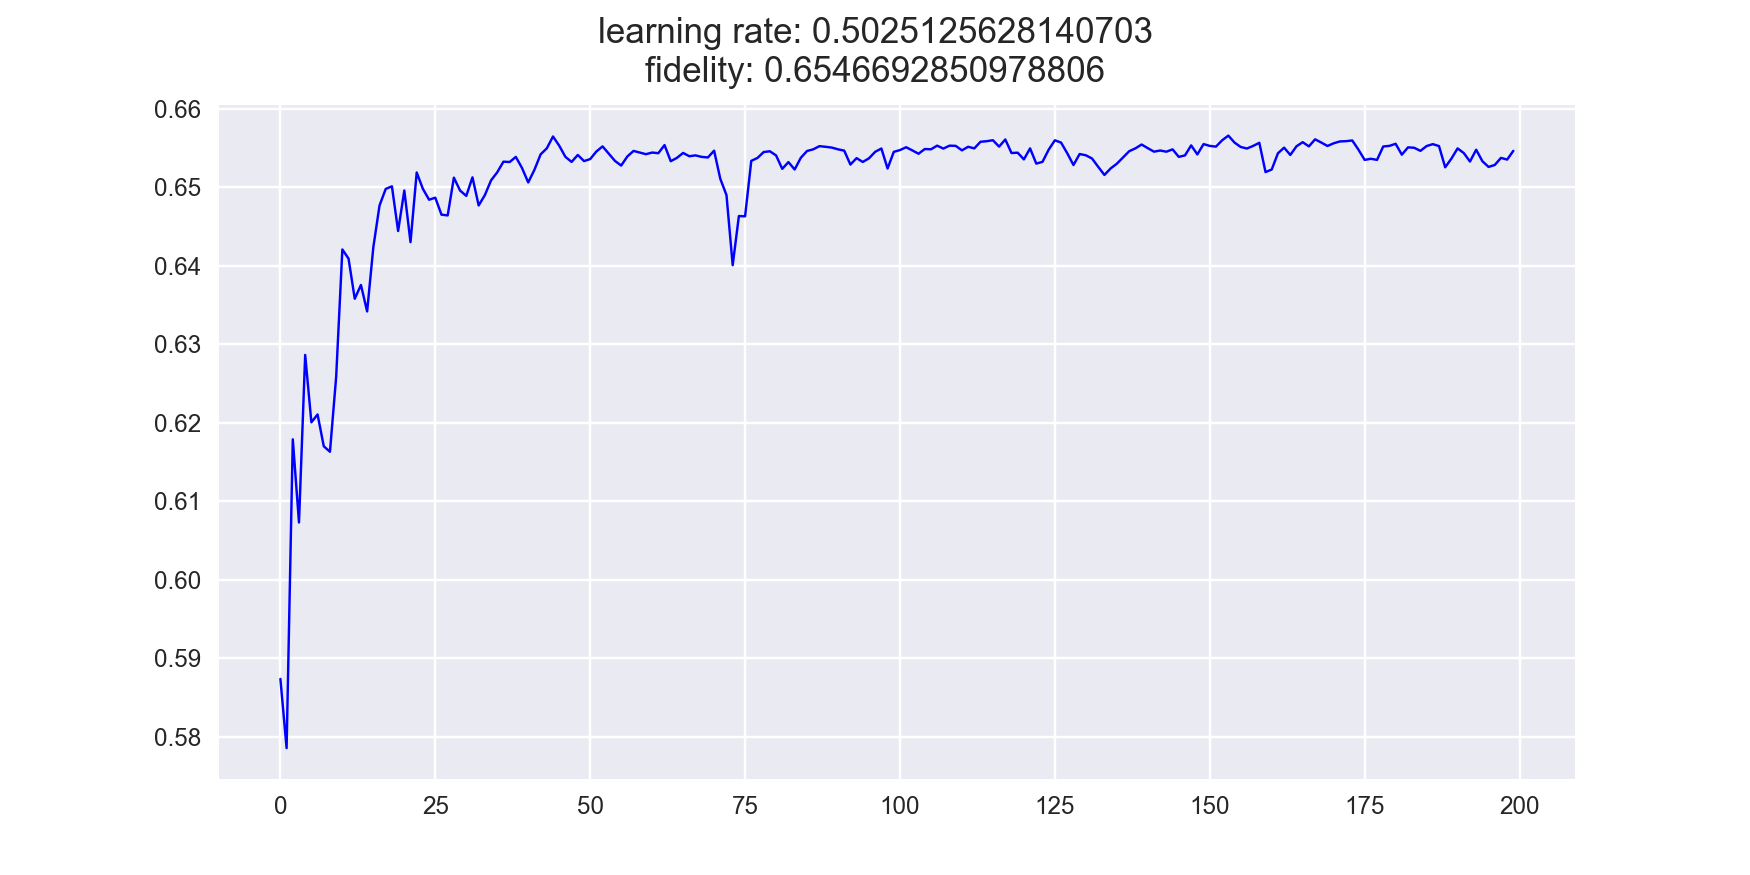

In [5]:
def decision_fn(input1, input2):
    if qutip.fidelity(input1, input2) > 0.8:
        return qutip.basis(2, 1)
    else:
        return qutip.basis(2, 0)
net = QubitNetworkDecisionProblemModel(num_qubits=5,
                                       num_qubits_per_input=(1, 1),
                                       num_qubits_answer=1,
                                       interactions='all',
                                       target_function=decision_fn)
optimizer = Optimizer(
    net=net,
    learning_rate=1.,
    n_epochs=200,
    batch_size=10,
    training_dataset_size=100,
    test_dataset_size=50,
    decay_rate=.005,
    sgd_method='momentum'
)
optimizer.run()